
# Title: Network Visualization
# Author: Rafael S. de Souza

## Introduction

In this Jupyter Notebook, we will explore the implementation of a network visualization for the Iris dataset using R. The main steps are as follows:

1. Load required libraries
2. Prepare the data
3. Calculate dissimilarity matrix using Manhattan distance
4. Create an undirected graph from the dissimilarity matrix
5. Compute minimum spanning tree using Prim's algorithm
6. Convert the graph to a ggnetwork object and join with the original data
7. Plot the network with ggplot

###  Load Required Libraries

In [1]:
require(cluster)
require(dplyr)
require(igraph)
require(ggnetwork)

Loading required package: cluster

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggnetwork

Loading required package: ggplot2



### Prepare the Data

In [2]:
df <- iris %>% mutate(ID = as.factor(seq(1:nrow(iris))))

### Calculate Dissimilarity Matrix Using Manhattan Distance

In [3]:
dissMat <- cluster::daisy(df[,-c(5,6)], metric="manhattan")

### Create an Undirected Graph from the Dissimilarity Matrix

In [4]:
undirected_graph <- igraph::graph.adjacency(
  as.matrix(dissMat),
  mode="undirected",
  weighted=TRUE,
  diag=FALSE
) %>% simplify(., remove.multiple = TRUE, remove.loops = TRUE)

# Set edge weights to their absolute values
E(undirected_graph)$weight <- abs(E(undirected_graph)$weight)

# Remove any vertices with no edges
undirected_graph <- delete.vertices(undirected_graph, degree(undirected_graph) == 0)

### Compute Minimum Spanning Tree Using Prim's Algorithm

In [5]:
net <- mst(undirected_graph, algorithm = "prim")

### Convert the Graph to a ggnetwork Object and Join with the Original Data

In [6]:
gnet <- ggnetwork(net) 
gnet <- gnet %>% mutate(ID = as.factor(name)) %>% left_join(df)

Joining, by = "ID"


### Plot the Network with ggplot

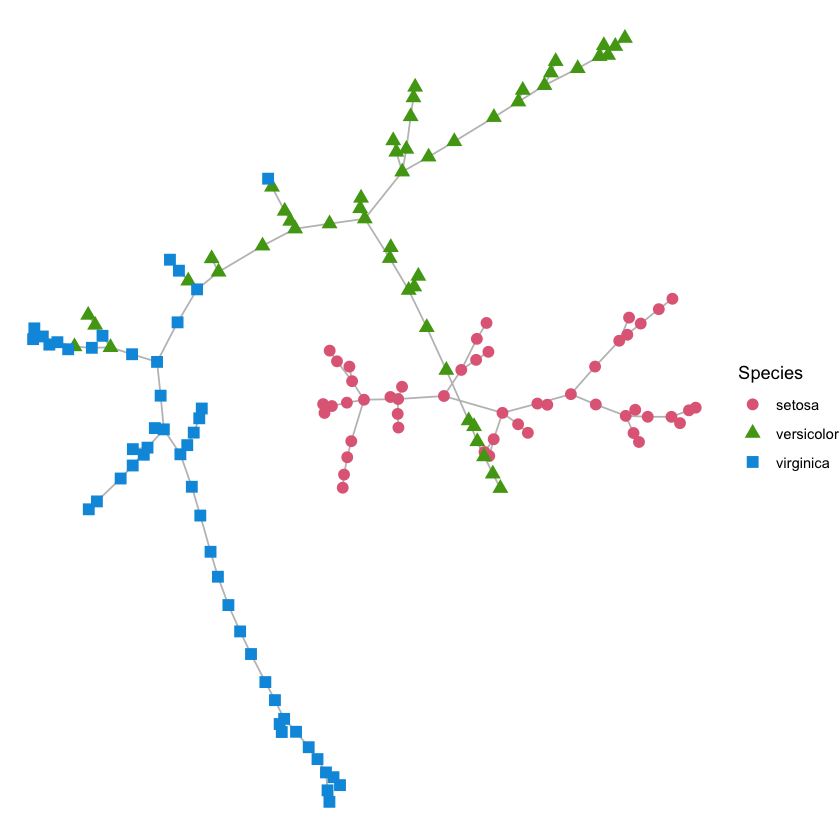

In [7]:
ggplot(gnet, aes(x = x, y = y, xend = xend, yend = yend)) +
    geom_edges(color = "grey75") +
    geom_nodes(aes(color = Species,shape=Species),size = 3 )+
    theme_void() +
    theme(legend.position="right")  +
    colorspace::scale_color_discrete_qualitative(name="Species") 